In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
import sklearn as skl

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# importing data set in to python envirinment
pd.set_option("display.max_columns", None)
#data=pd.read_csv(path+'/dataset.csv')
data=pd.read_csv('drugsideeffects.csv')

In [4]:
#display data
data

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...
308347,differin,8,Considerably Effective,acne,Mild Side Effects
308348,imitrex,8,Considerably Effective,migraines,Mild Side Effects
308349,prilosec,10,Highly Effective,acid reflux,No Side Effects
308350,fosamax,1,Ineffective,possible osteoporosis,Extremely Severe Side Effects


In [5]:
#shape of the dataset
data.shape

(308352, 5)

In [6]:
#columns present in the dataset
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

In [7]:
#A concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308352 entries, 0 to 308351
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   urlDrugName    308352 non-null  object
 1   rating         308352 non-null  int64 
 2   effectiveness  308352 non-null  object
 3   condition      308256 non-null  object
 4   sideEffects    308352 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.8+ MB


In [8]:
data.describe()

,rating
count,308352.000000
mean,7.007521
std,2.934459
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [9]:
# no of unique values present in the dataset
data.nunique()

urlDrugName       502
rating             10
effectiveness       5
condition        1426
sideEffects         5
dtype: int64

In [10]:
data.value_counts('effectiveness')

effectiveness
Highly Effective          131760
Considerably Effective     92283
Moderately Effective       41235
Ineffective                24552
Marginally Effective       18522
dtype: int64

In [11]:
data.value_counts(['sideEffects'])

sideEffects                  
Mild Side Effects                101454
No Side Effects                   92160
Moderate Side Effects             60819
Severe Side Effects               36699
Extremely Severe Side Effects     17220
dtype: int64

In [12]:
# Checking null values
data.isna().sum()

urlDrugName       0
rating            0
effectiveness     0
condition        96
sideEffects       0
dtype: int64

### EXPLORATORY DATA ANALYSIS

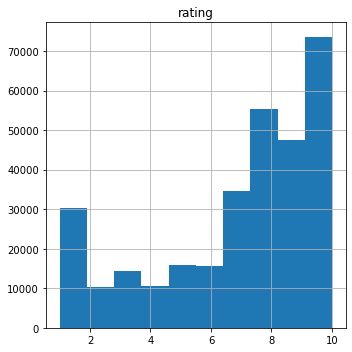

In [13]:
#frequency graph of dataset
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(5,5))
plt.tight_layout()
plt.show()

Text(0, 0.5, 'No.of peoples')

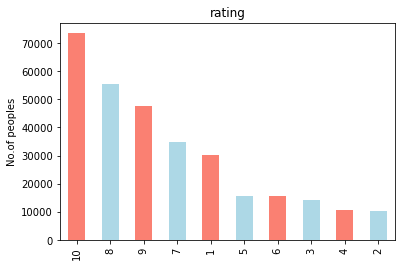

In [14]:
#plotting bar chart
data["rating"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);
plt.title("rating")
plt.ylabel("No.of peoples")

<AxesSubplot:ylabel='effectiveness'>

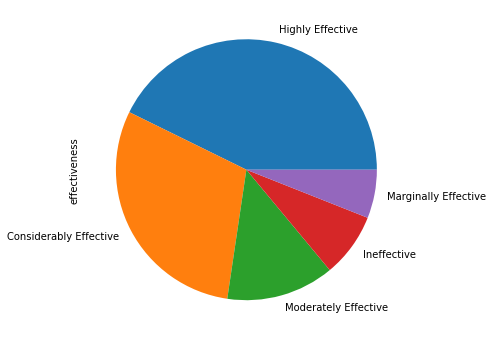

In [15]:
#plotting a pie chart
data.effectiveness.value_counts().plot(kind="pie",figsize=(8,6))


<AxesSubplot:ylabel='sideEffects'>

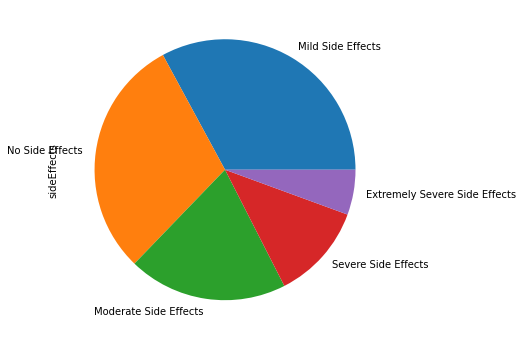

In [16]:
#plotting a pie chart
data.sideEffects.value_counts().plot(kind="pie",figsize=(8,6))


Text(0.5, 1.0, 'Histogram of Rating')

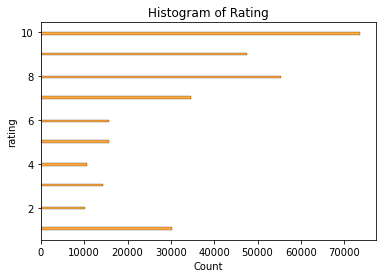

In [17]:
# Histplot of Rating
sns.histplot(y="rating",data=data,color="darkorange")
plt.title('Histogram of Rating')

<AxesSubplot:xlabel='rating', ylabel='count'>

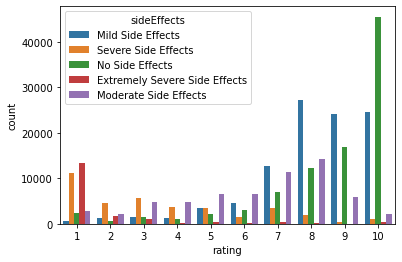

In [18]:
sns.countplot(x="rating",data=data,hue="sideEffects")

<AxesSubplot:xlabel='rating', ylabel='effectiveness'>

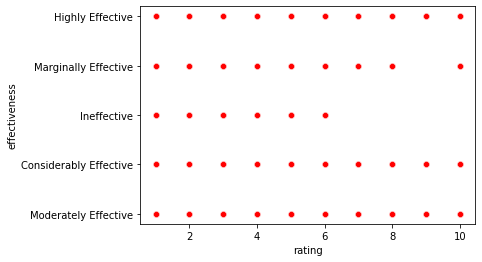

In [19]:
sns.scatterplot(data['rating'],data['effectiveness'],color="red")

<AxesSubplot:xlabel='effectiveness', ylabel='count'>

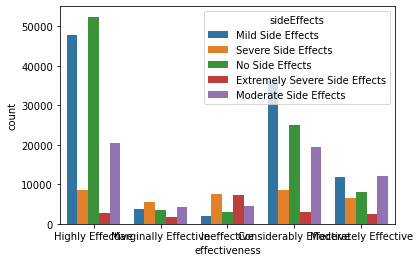

In [20]:
sns.countplot(x="effectiveness",data=data,hue="sideEffects")

# DATA PREPROCESSING

## 1. Missing value handling

In [21]:
# Checking null values
data.isna().sum()

urlDrugName       0
rating            0
effectiveness     0
condition        96
sideEffects       0
dtype: int64

In [22]:
data.dropna(axis=0,inplace=True)

In [23]:
# Checking null values
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

## 2. Outlier detection

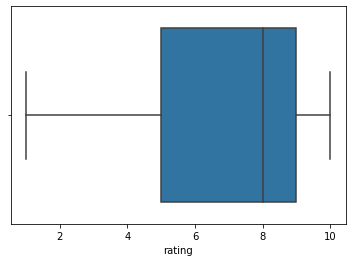

In [24]:
# Outlier detection using boxplot
for i in ['rating']:
  sns.boxplot(x=data[i])
  plt.show()

### No outlier is present.

## 3.Encoding

In [25]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
#creating an instance LabelEncoder
label_en =LabelEncoder()
a=['urlDrugName', 'effectiveness', 'condition', 'sideEffects']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])


In [26]:
data.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,166,4,1,797,1
1,319,1,1,224,4
2,345,10,1,819,3
3,353,3,3,11,1
4,259,2,3,492,4


## 4.Standardization

In [27]:
#Splitting the data
y=data["sideEffects"]
x=data.drop(['sideEffects'],axis=1)

In [28]:
x

,urlDrugName,rating,effectiveness,condition
0,166,4,1,797
1,319,1,1,224
2,345,10,1,819
3,353,3,3,11
4,259,2,3,492
...,...,...,...,...
308347,139,8,0,15
308348,215,8,0,835
308349,353,10,1,11
308350,196,1,2,1032


In [29]:
#importing StandardScaler
from sklearn import preprocessing
#creating an instance StandardScaler
stdr = preprocessing.StandardScaler()
x=stdr.fit_transform(x)

In [30]:
print(x.shape)
print(y.shape)

(308256, 4)
(308256,)


In [31]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(231192, 4)
(231192,)
(77064, 4)
(77064,)


# MODELLING

## 1. Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9567113048894426
precision is : 0.9570271411486214
recall is : 0.9603946409291042
F1 score is : 0.9585946202020317


pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

In [35]:
t=[]
t.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 2. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred= logit_model.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [38]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.4760069552579674
Precision is: 0.4688172757639987
Recall is : 0.4416127738787733
f1 score is: 0.44771511961210103


In [39]:
t.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [40]:
confusion_matrix(y_test, y_pred)

array([[ 1667,   122,   134,    77,  2277],
       [   85, 14535,  1583,  8661,   682],
       [  362,  7325,  3801,  2066,  1651],
       [  333,  8388,   964, 12554,   642],
       [ 1044,  1399,  2111,   475,  4126]], dtype=int64)

## 3. KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred= classifier.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [42]:
acc_values

[0.954907609259836,
 0.9536618914149279,
 0.9556083255475968,
 0.9545442748884044,
 0.9548946330322848,
 0.9550892764455517,
 0.9566983286618914,
 0.9549724903975916,
 0.9567113048894426,
 0.9564388041108689,
 0.956646423751687,
 0.9557380878231081]

Text(0, 0.5, 'accuracy')

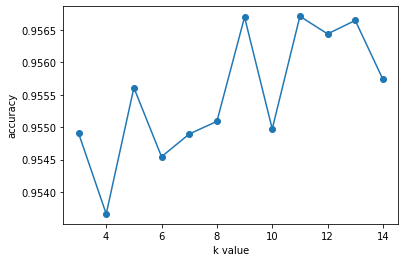

In [43]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [44]:
classifier=KNeighborsClassifier(n_neighbors=11, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [45]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9567113048894426
precision is : 0.9608474338464117
recall is : 0.9578940419898055
F1 score is : 0.9592979598976585


In [46]:
confusion_matrix(y_test, y_pred)

array([[ 4113,     0,    25,     0,   139],
       [   25, 24507,   272,   668,    74],
       [    0,   597, 14402,    89,   117],
       [   51,   951,     0, 21865,    14],
       [   67,   122,    81,    44,  8841]], dtype=int64)

In [47]:
t.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 4. Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [49]:
y_pred=classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.4573211875843455

In [51]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.4573211875843455
precision is : 0.43380532584602516
recall is : 0.4575957205343939
F1 score is : 0.44073231372785315


In [52]:
t.append(['Gaussian Naive Bayes',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 5. Bernoulli Naive Bayes

In [53]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB()

In [54]:
y_pred=classifier.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.37882798712758226

In [56]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.37882798712758226
precision is : 0.2973848322392467
recall is : 0.32813117676105313
F1 score is : 0.3015391377894815


In [57]:
t.append(['Bernoulli Naive Bayes',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 6. Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [59]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9568410671649538
precision is : 0.9569460499738515
recall is : 0.9603479737878565
F1 score is : 0.9585185665846968


In [60]:
y_test.value_counts()

1    25546
3    22881
2    15205
4     9155
0     4277
Name: sideEffects, dtype: int64

In [61]:
confusion_matrix(y_test, y_pred)

array([[ 4199,     0,     0,     0,    78],
       [   25, 24448,   205,   725,   143],
       [   27,   652, 14393,    24,   109],
       [   51,   770,   107, 21927,    26],
       [  145,   126,    80,    33,  8771]], dtype=int64)

In [62]:
t.append(['Decision Tree Clssifier',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 7. Gradient Booster

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred=gb.predict(x_test)

In [65]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.6364190802449912
precision is : 0.6433707209495977
recall is : 0.6433549285026903
F1 score is : 0.6409117171779279


In [66]:
t.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## 8. Extreme Gradient Booster

In [67]:
from xgboost import XGBClassifier
xb=XGBClassifier()
xb.fit(x_train,y_train)

[14:51:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [68]:
y_pred=xb.predict(x_test)

In [69]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.936105055538254
precision is : 0.9447525753161434
recall is : 0.9431855957023615
F1 score is : 0.9436096359093185


In [70]:
t.append(['Extreme Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


## Fine Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid_params = { 'n_neighbors' : [4,6,8,10,12],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [73]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [74]:
# fit the model on our train set
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [75]:
g_res.best_score_

0.9563349942904599

In [76]:
 #get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'uniform'}

In [77]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
y_pred=knn.fit(x_train, y_train)

In [78]:
# get a prediction
y_pred=knn.predict(x_test)


In [79]:
print("accuracy is :",accuracy_score(y_test,y_pred))

accuracy is : 0.9557121353680058


In [80]:
t.append(['knn_fine_tuning',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])

In [81]:
df = pd.DataFrame(t, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df

,Algorithms,F1-Score,accuracy,precision,recall
0,Random Forest,0.95859,0.95671,0.95703,0.96039
1,Logistic Regression,0.44772,0.47601,0.46882,0.44161
2,KNN,0.95930,0.95671,0.96085,0.95789
3,Gaussian Naive Bayes,0.44073,0.45732,0.43381,0.45760
4,Bernoulli Naive Bayes,0.30154,0.37883,0.29738,0.32813
5,Decision Tree Clssifier,0.95852,0.95684,0.95695,0.96035
6,Gradient Booster,0.64091,0.63642,0.64337,0.64335
7,Extreme Gradient Booster,0.94361,0.93611,0.94475,0.94319
8,knn_fine_tuning,0.95803,0.95571,0.95795,0.95852


In [82]:
v = pd.DataFrame({'Predicted Data': y_pred, 'Test Data' : y_test})
v.sample(10)

,Predicted Data,Test Data
78696,1,1
76751,1,1
151474,1,1
111659,1,1
112629,3,3
131687,2,2
153911,3,3
30904,1,1
105893,1,1
212806,4,4
